<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Implememtation of the Scratch Logistic Regression

In [2]:
import numpy as np

class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias=True, verbose=False, lambda_val=0):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lambda_val = lambda_val
        self.coef_ = None
        self.loss = []
        self.val_loss = []  # Add initialization for val_loss

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _hypothesis(self, X):
        z = np.dot(X, self.coef_)
        return self._sigmoid(z)

    def _gradient_descent(self, X, y):
        m = len(y)
        h = self._hypothesis(X)
        gradient = np.dot(X.T, (h - y)) / m

        # Regularization term
        regularization_term = (self.lambda_val / m) * self.coef_
        regularization_term[0] = 0  # Exclude bias term from regularization
        gradient += regularization_term

        self.coef_ -= self.lr * gradient

    def fit(self, X, y):
        if self.bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        n_features = X.shape[1]
        self.coef_ = np.zeros(n_features)

        for _ in range(self.iter):
            self._gradient_descent(X, y)
            loss = self._compute_loss(X, y)
            self.loss.append(loss)
            if self.verbose:
                print(f"Loss: {loss}")

    def _compute_loss(self, X, y):
        h = self._hypothesis(X)
        loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        regularization_term = (self.lambda_val / (2 * len(y))) * np.sum(self.coef_[1:] ** 2)  # Exclude bias term
        return loss + regularization_term

    def predict(self, X):
        if self.bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        h = self._hypothesis(X)
        return (h >= 0.5).astype(int)

    def predict_proba(self, X):
        if self.bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self._hypothesis(X)


# Excercise 1: Hypothetical function

In [3]:
# Create an instance of the ScratchLogisticRegression class
model = ScratchLogisticRegression(num_iter=50, lr=0.01, bias=False, verbose=False)

# Set the theta parameter (for demonstration purposes)
model.coef_ = np.array([-2, 1])

# Sample input data
X = np.array([[1, 2], [3, 4], [5, 6]])

# Obtain the estimated probabilities using the hypothesis function
probabilities = model._hypothesis(X)
print("Estimated Probabilities:")
print(probabilities)

Estimated Probabilities:
[0.5        0.11920292 0.01798621]


# 【Excercise 2】Steepest descent

In [4]:
X = np.array([[1], [2], [3]])
y = np.array([0, 1, 0])

# Create an instance of the ScratchLogisticRegression class
model = ScratchLogisticRegression(num_iter=50, lr=0.01,bias=True, verbose=True, lambda_val=0.1)

# Fit the model
model.fit(X, y)

# Print the learned coefficients
print("Learned Coefficients:", model.coef_)

Loss: 0.6917680832961024
Loss: 0.6904275999047583
Loss: 0.6891246433883703
Loss: 0.6878581556801535
Loss: 0.6866271070458464
Loss: 0.6854304954838748
Loss: 0.6842673461252174
Loss: 0.6831367106341742
Loss: 0.6820376666111398
Loss: 0.6809693169983838
Loss: 0.6799307894897542
Loss: 0.6789212359451353
Loss: 0.6779398318104064
Loss: 0.676985775543579
Loss: 0.6760582880477141
Loss: 0.6751566121111598
Loss: 0.674280011855582
Loss: 0.6734277721922071
Loss: 0.6725991982866403
Loss: 0.6717936150325768
Loss: 0.6710103665346641
Loss: 0.6702488156007498
Loss: 0.6695083432436923
Loss: 0.6687883481928846
Loss: 0.6680882464156016
Loss: 0.6674074706482568
Loss: 0.6667454699376192
Loss: 0.6661017091920185
Loss: 0.6654756687425414
Loss: 0.6648668439142024
Loss: 0.6642747446070484
Loss: 0.6636988948871434
Loss: 0.6631388325873604
Loss: 0.6625941089178922
Loss: 0.6620642880863865
Loss: 0.6615489469275874
Loss: 0.661047674542369
Loss: 0.6605600719460258
Loss: 0.6600857517256847
Loss: 0.6596243377066914
Los

Excercise 3: Estimation

In [5]:
# estimating the predicted values
X = np.random.randn(30, 1)
y = np.random.randn(30,)

X_test = np.random.randn(5, 1)

In [6]:
#calling the class
instance = ScratchLogisticRegression(num_iter=50, lr=0.001, bias=True, verbose=False)

In [7]:
X.shape, y.shape

((30, 1), (30,))

In [8]:
#fitting the data
instance.fit(X, y)

In [9]:
# predicting using the fitted model
y_predict = instance.predict(X_test)
y_predict.shape

(5,)

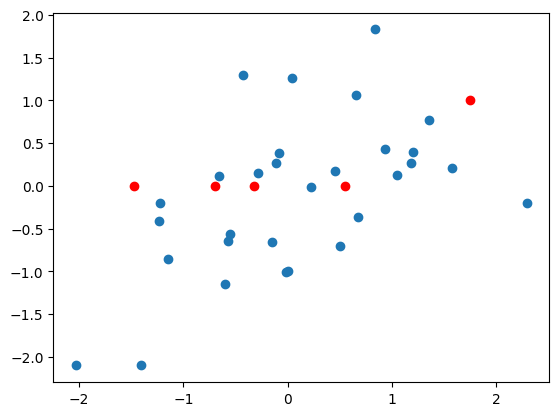

In [10]:
#visualizing the plot
plt.scatter(X, y)
plt.scatter(X_test, y_predict, color='red')
plt.show()

# [Excercise 5] Learning and estimation

In [11]:
#learning and estimation using the Iris dataset(Scratch Implementation)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data[:100, :]
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#calling the scratch class
class_stch = ScratchLogisticRegression(num_iter=50, lr=0.01, bias = True, verbose=True, lambda_val=0)
#fitting the model
class_stch.fit(X_train, y_train)
y_pred = class_stch.predict(X_test)
y_pred

Loss: 0.6860776985679993
Loss: 0.6791140881261637
Loss: 0.6722547426562665
Loss: 0.6654980674820965
Loss: 0.6588424805161559
Loss: 0.652286412901306
Loss: 0.6458283096083912
Loss: 0.639466629990978
Loss: 0.6331998482983954
Loss: 0.6270264541483075
Loss: 0.6209449529600788
Loss: 0.6149538663502234
Loss: 0.609051732491245
Loss: 0.6032371064351948
Loss: 0.5975085604032768
Loss: 0.5918646840428379
Loss: 0.5863040846530743
Loss: 0.5808253873807848
Loss: 0.5754272353874867
Loss: 0.570108289989196
Loss: 0.5648672307701614
Loss: 0.5597027556718158
Loss: 0.5546135810581895
Loss: 0.5495984417590005
Loss: 0.5446560910916153
Loss: 0.5397853008630398
Loss: 0.5349848613530702
Loss: 0.5302535812797069
Loss: 0.5255902877478918
Loss: 0.5209938261826077
Loss: 0.5164630602473341
Loss: 0.511996871748827
Loss: 0.507594160529149
Loss: 0.5032538443458462
Loss: 0.4989748587411321
Loss: 0.49475615690090147
Loss: 0.4905967095043683
Loss: 0.4864955045650815
Loss: 0.48245154726404593
Loss: 0.4784638597756349
Loss

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Using Scikit Learn Framework

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_lr

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [16]:
#checking the accuracy metrics
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



the classification report for the scratch implementation and the logistic Regression modle performed excelllently in handling the data.

# [Excercise 6] Plot of learning curve

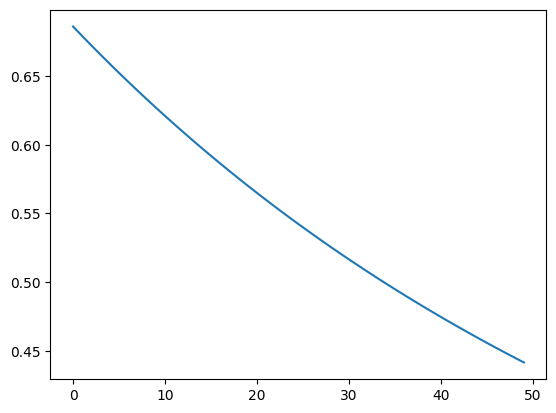

In [27]:
%matplotlib inline
plt.plot(class_stch.loss)
plt.plot(class_stch.val_loss)

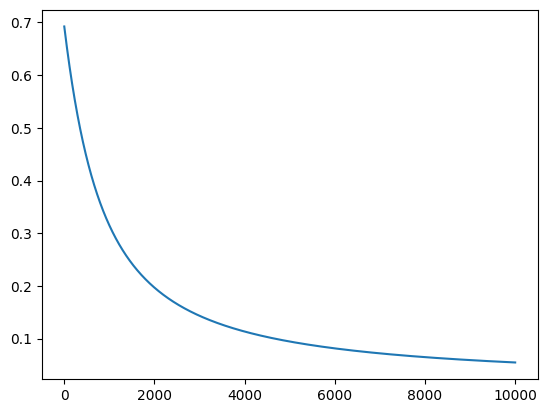

In [18]:
class_stch1 = ScratchLogisticRegression(num_iter=10000, lr=0.001, bias = True, verbose=False, lambda_val=0.2)
class_stch1.fit(X_train, y_train)
y_pred1 = class_stch1.predict(X_test)

#plotting the learning curve
plt.plot(class_stch1.loss)
plt.plot(class_stch1.val_loss)

I observed that increasing the value of lamda leads to better learning results.

In [25]:
#setting verbose to true
X1 = iris.data[:100, :2]
y1 = iris.target[:100]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=50, lr=0.001, bias=True, verbose=True, lambda_val=0.2)
slr.fit(X_train1, y_train1)

# Predict labels on the test set
y_pred2 = slr.predict(X_test1)

Loss: 0.6929092341506472
Loss: 0.692674755105721
Loss: 0.6924436722254582
Loss: 0.6922159157659384
Loss: 0.6919914174100781
Loss: 0.6917701102392125
Loss: 0.6915519287051995
Loss: 0.6913368086030394
Loss: 0.691124687044005
Loss: 0.6909155024292707
Loss: 0.6907091944240353
Loss: 0.690505703932132
Loss: 0.6903049730711159
Loss: 0.6901069451478232
Loss: 0.689911564634394
Loss: 0.689718777144751
Loss: 0.6895285294115286
Loss: 0.6893407692634432
Loss: 0.6891554456030976
Loss: 0.6889725083852137
Loss: 0.6887919085952854
Loss: 0.6886135982286458
Loss: 0.6884375302699379
Loss: 0.6882636586729897
Loss: 0.6880919383410767
Loss: 0.6879223251075745
Loss: 0.6877547757169882
Loss: 0.6875892478063548
Loss: 0.6874256998870135
Loss: 0.6872640913267324
Loss: 0.6871043823321912
Loss: 0.6869465339318093
Loss: 0.6867905079589146
Loss: 0.6866362670352478
Loss: 0.6864837745547936
Loss: 0.6863329946679357
Loss: 0.6861838922659269
Loss: 0.6860364329656713
Loss: 0.6858905830948103
Loss: 0.6857463096771087
Loss:

# [Problem 7] Visualization of decision area

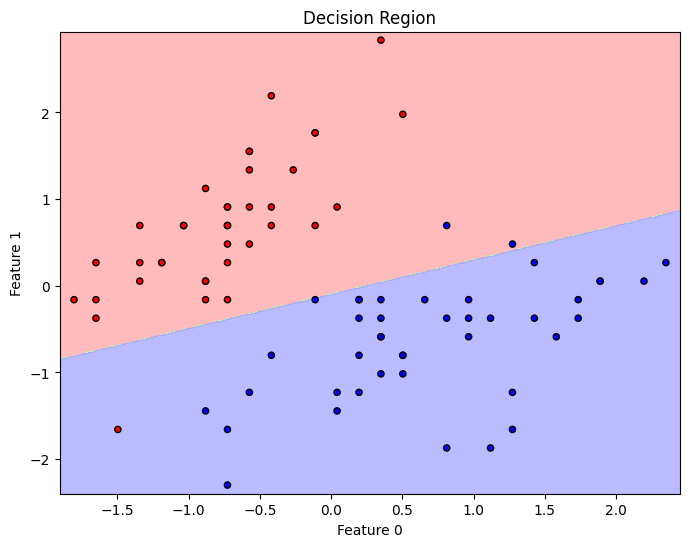

In [24]:
#plotting the decision boundary
from matplotlib.colors import ListedColormap

def decision_region(X, y, class_stch):
    # Create a mesh grid of points
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = class_stch.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision region
    plt.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('Decision Region')
    plt.show()

decision_region(X_train, y_train, slr)